In [1]:
import os

import warnings
warnings.filterwarnings("ignore")

# For file handling
import pandas as pd
pd.set_option("display.max_rows", 999)
pd.set_option('max_colwidth',100)

# For numerical calculation
import numpy as np
from IPython.display import display

#For Regular Expression
import re, string, unicodedata

from datetime import datetime
# datetime object containing current date and time

# For NLP
import nltk
nltk.download('words')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
eng_words = set(nltk.corpus.words.words())
stop_words = set(stopwords.words("english")) 

from nltk.stem import PorterStemmer, WordNetLemmatizer
from TurkishStemmer import TurkishStemmer
stemm = PorterStemmer()
lem = WordNetLemmatizer()
stemmer = TurkishStemmer()

#from wordcloud import WordCloud, STOPWORDS

# For Visualization
from matplotlib import rcParams
from matplotlib import pyplot as plt
rcParams['figure.figsize'] = 10, 20


# BERT related packages
import simpletransformers
from simpletransformers.classification import ClassificationModel
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\ETAACPH\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [2]:
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import math

In [3]:
dataset = pd.read_excel(r"C:\Users\ETAACPH\OneDrive - Ericsson\Project\Vodafone\Dataset\Master_Correct Incidentt.xlsx")
dataset.head(3)

,WONUM,REPORTDATE,MONTH,STATUS,FIRST_LOG,LAST_LOG,FULL_LOG,PROBLEM_CATEGORY_NO,PROBLEM_CATEGORY_DESC
0,14118026,2020-09-01 08:17:16,2020/09,CLOSE,5434802877 gsme mağazam tablet üzerinden faturalı taşıma yapmak istiyoruz. kullanıcı bilgi ekran...,ınternet explorer gecmısı temızlenerek ve ınternet ayarları kontrol edılerek denenmelıdır\ngenel...,"ASSIGNED - 01/09/2020 08:34:28 - Kuplemez, Aylin, Vodafone Turkey (External) - Bilgi Teknolojile...",12358.0,MNT Birey. Açılmayan Hat-VShop
1,14118547,2020-09-01 10:39:14,2020/09,CLOSE,5331630737 gsm noya mnp işlemi yapılmış hat aktif konuma gelmiş ancak şebekesi görüntülenmemekte...,Telefon kapatıp açıldığında sorun düzelecektir. Tanımlamalarıyla ilgili bir problem bulunmamakta...,"ASSIGNED - 01/09/2020 11:45:29 - Artun, Alaz, Vodafone Turkey (External) - 3.Party Çalışanlar: T...",12358.0,MNT Birey. Açılmayan Hat-VShop
2,14118303,2020-09-01 09:41:24,2020/09,CLOSE,5376624717 gsm için faturasız mnp yapılmış işlem beklemede kalmıştır.İşlem tarafımızdan silinmek...,Bu işlem BTK ya gönderilmiş. İptal edilemez surec beklenmelıdır,"ASSIGNED - 01/09/2020 09:45:52 - Kuplemez, Aylin, Vodafone Turkey (External) - Bilgi Teknolojile...",12358.0,MNT Birey. Açılmayan Hat-VShop


In [4]:
dataset["FIRST_LOG"].replace('', np.nan, inplace=True)
dataset.dropna(subset=["FIRST_LOG"], inplace=True)

In [5]:
dataset['PROBLEM_CATEGORY_DESC'] = dataset['PROBLEM_CATEGORY_DESC'].str.strip()

In [6]:
# Dropping other columns except input and target variable based on the clients input.
dataset = dataset[["WONUM", "FIRST_LOG","PROBLEM_CATEGORY_DESC"]]
classes = dataset["PROBLEM_CATEGORY_DESC"].unique()
classes

array(['MNT Birey. Açılmayan Hat-VShop', 'Bireysel Fatura Problemi',
       'KUR - Sipariş Sorunları', 'ABONE EKRAN HATALARI',
       'Siparis Sorunlari', 'Others', 'Misc'], dtype=object)

In [7]:
def remove_na(dataset):
    """
    Dropping rows which have null value
    """
    print("Shape of Dataset before removing NaN:", dataset.shape)
    dataset = dataset.dropna()
    dataset = dataset.reset_index(drop=True)
    print("Shape of Dataset after removing NaN:", dataset.shape)
    
    return dataset

# Removing Punctuation and Number in the dataset
def remove_punct_char_num(data):
    """
    Remove the punctualtions and numbers
    """
    return re.sub('[^abcçdefgğhıijklmnoöprsştuüvyzmi̇z]',' ' ,data)

def remove_url_data(data):
    """
    Removes the URL in data
    """
    return re.sub(r'http\S+','', data)

def perform_word_tokenize(data):
    """
    Convert the sentence into words
    """
    return nltk.word_tokenize(data)

def remove_repeating_words(data):
    """
    Remove repeating words
    """
    return set(data)

def remove_small_words(data):
    """
    Remove the word/keywords whose length is less than 2
    """
    return [i for i in data if len(i) > 2]

def remove_stop_words(data):
    """
    Remove the stop words
    """
    text = [word for word in data if not word in set(stopwords.words("turkish"))]
    return text

def perfrom_word_stemming(data):
    """
    Perform word stemming
    """
    text = [stemmer.stem(word) for word in data]
    return text

def convert_to_sentence(data):
    """
    Convert the tokenized words into sentence
    """
    return " ".join(data)

def convert_to_lower(data):
    """
    Converts data/text to lowercase
    """
    return str(data).lower()


#dataset["FIRST_LOG"] = dataset["FIRST_LOG"].apply(remove_na)
dataset.drop_duplicates()
dataset["FIRST_LOG"] = dataset["FIRST_LOG"].apply(remove_punct_char_num)
dataset["FIRST_LOG"] = dataset["FIRST_LOG"].apply(remove_url_data)
dataset["FIRST_LOG"] = dataset["FIRST_LOG"].apply(perform_word_tokenize)
dataset["FIRST_LOG"] = dataset["FIRST_LOG"].apply(remove_repeating_words)
dataset["FIRST_LOG"] = dataset["FIRST_LOG"].apply(remove_small_words)
dataset["FIRST_LOG"] = dataset["FIRST_LOG"].apply(remove_stop_words)
dataset["FIRST_LOG"] = dataset["FIRST_LOG"].apply(perfrom_word_stemming)
dataset["FIRST_LOG"] = dataset["FIRST_LOG"].apply(convert_to_sentence)
dataset["FIRST_LOG"] = dataset["FIRST_LOG"].apply(convert_to_lower)


In [8]:
def looping_df_class(dataset, cls):
    """
    Looping over df for respective class
    """
    print("Inside looping_df_class")
    data = dataset.loc[dataset['PROBLEM_CATEGORY_DESC'] == cls]
    if data.empty:
        print("*****************************************************")
        print("This data is empty:", cls)
        print("*****************************************************")
        return data
    else:
        return data

In [9]:

def vectorising_df(data):
    print("Inside vectorising_df")
    print("Shape of Dataset before Vectorization:",data.shape)
    labels = []
    tfidfVector = TfidfVectorizer(stop_words=stopwords.words('turkish'))
    features = tfidfVector.fit_transform(data["FIRST_LOG"]).toarray()
    labels = data.PROBLEM_CATEGORY_DESC
    #print(labels)
    vectorised_df = pd.DataFrame()
    vectorised_df = pd.DataFrame(features, columns=tfidfVector.get_feature_names())
    vectorised_df["WONUM"] = data["WONUM"]
    vectorised_df["FIRST_LOG"] = data["FIRST_LOG"]
    vectorised_df["PROBLEM_CATEGORY_DESC"] = labels
    
    return vectorised_df

In [10]:
def performing_K_means(data, K):
    
    cluster_df = pd.DataFrame()
    y = data["PROBLEM_CATEGORY_DESC"]
    #input_data = data.loc[:, data.columns not in ["WONUM","PROBLEM_CATEGORY_DESC"]]
    input_data = data.loc[:, ~data.columns.isin(["WONUM","FIRST_LOG", "PROBLEM_CATEGORY_DESC"])]
    
    #print(input_data.columns)
    #print(type(input_data))
    
    clusters = KMeans(n_clusters=int(K)).fit_predict(input_data)
    #print("Clusters", clusters)
    
    cluster_df = cluster_df.join(input_data)
    cluster_df["WONUM"] = data["WONUM"]
    cluster_df["FIRST_LOG"] = data["FIRST_LOG"]
    cluster_df["PROBLEM_CATEGORY_DESC"] = y
    cluster_df["Bucket"] = clusters
    return cluster_df

In [11]:
def calc_distance(x1, y1, a, b, c):
  d = abs((a * x1 + b * y1 + c)) / (math.sqrt(a * a + b * b))
  return d

def perform_clustering(data):
    print("Inside Clustering")
    
    distance_of_points_from_line = []
    y = data["PROBLEM_CATEGORY_DESC"]
    #x = data.loc[:, data.columns not in ["WONUM","PROBLEM_CATEGORY_DESC"]]
    x = data.loc[:, ~data.columns.isin(["WONUM","FIRST_LOG","PROBLEM_CATEGORY_DESC"])]
    
    #x = data.drop(["PROBLEM_CATEGORY_DESC"], axis = 1) 
    #print(x)
    dist_points_from_cluster_center = []
    K = range(1,15)
    for no_of_clusters in K:
        k_model = KMeans(n_clusters=no_of_clusters)
        k_model.fit(x)
        dist_points_from_cluster_center.append(k_model.inertia_)
        
    plt.plot(K, dist_points_from_cluster_center)
    
    plt.plot(K, dist_points_from_cluster_center)
    plt.plot([K[0], K[13]], [dist_points_from_cluster_center[0], 
                        dist_points_from_cluster_center[13]], 'ro-')
    
    x = [K[0], K[13]]
    y = [dist_points_from_cluster_center[0], dist_points_from_cluster_center[13]]

    # Calculate the coefficients. This line answers the initial question. 
    coefficients = np.polyfit(x, y, 1)

    # Print the findings
    print('a =', coefficients[0])
    print('b =', coefficients[1])

    # Let's compute the values of the line...
    polynomial = np.poly1d(coefficients)
    x_axis = np.linspace(0,4,100)
    y_axis = polynomial(x_axis)
    
    a = dist_points_from_cluster_center[0] - dist_points_from_cluster_center[13]
    b = K[13] - K[0]
    c1 = K[0] * dist_points_from_cluster_center[13]
    c2 = K[13] * dist_points_from_cluster_center[0]
    c = c1 - c2
    
    for k in range(14):
        distance_of_points_from_line.append(
        calc_distance(K[k], dist_points_from_cluster_center[k], a, b, c))
    
    plt.plot(K, distance_of_points_from_line)
    plt.show()
    
    K = distance_of_points_from_line.index(max(distance_of_points_from_line)) + 1
    print("\n########### Optimum K-Value for the Class:", K)
    
    # Calling a function to perform clustering and return clustered dataset
    
    clustered_df = performing_K_means(data, K)
    
    return clustered_df

Inside vectorising_df
Shape of Dataset before Vectorization: (1834, 3)
*************************** MNT Birey. Açılmayan Hat-VShop ***************************
Inside looping_df_class
Shape of Filtered Dataset: (201, 11046)
Inside Clustering
a = -4.160018482861616
b = 157.72791684138824


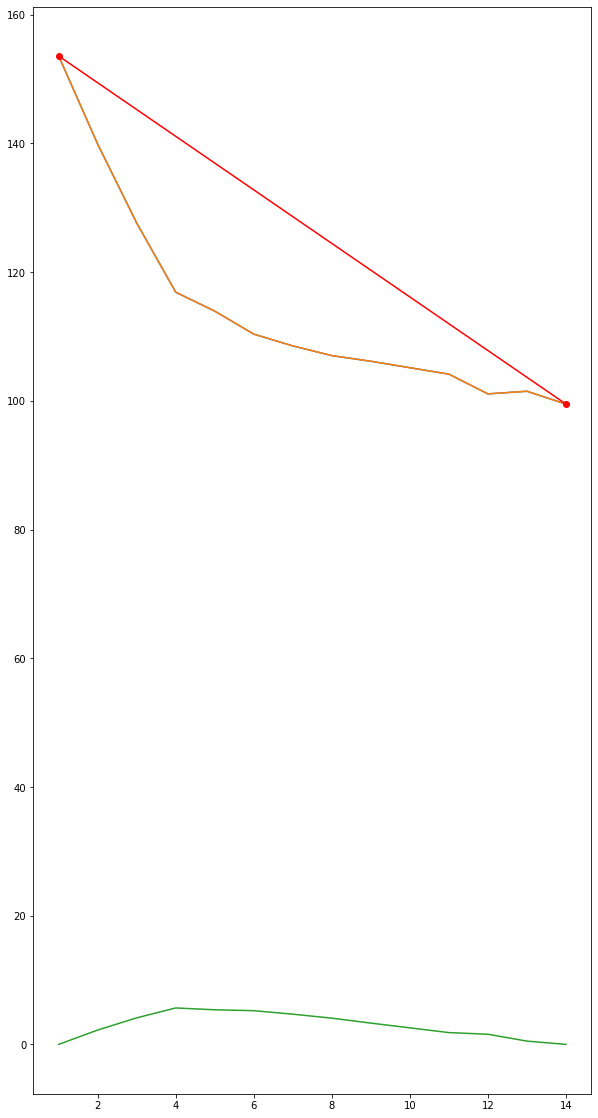


########### Optimum K-Value for the Class: 4
201
*************************** Bireysel Fatura Problemi ***************************
Inside looping_df_class
Shape of Filtered Dataset: (262, 11046)
Inside Clustering
a = -2.1353730533804587
b = 229.37343664680583


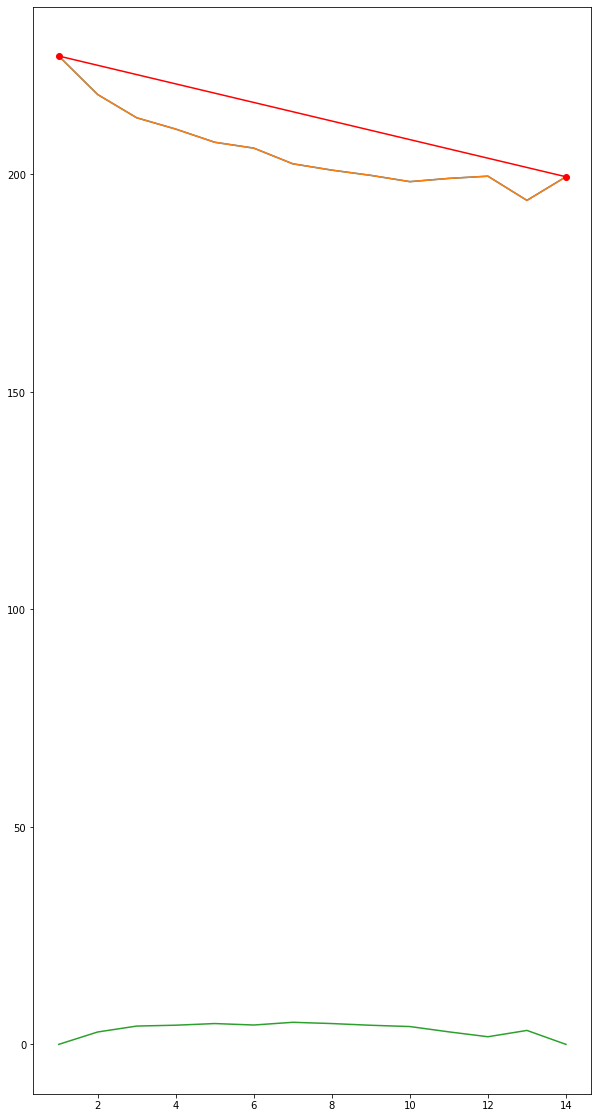


########### Optimum K-Value for the Class: 7
262
*************************** KUR - Sipariş Sorunları ***************************
Inside looping_df_class
Shape of Filtered Dataset: (354, 11046)
Inside Clustering
a = -6.849610389048412
b = 319.4960182204572


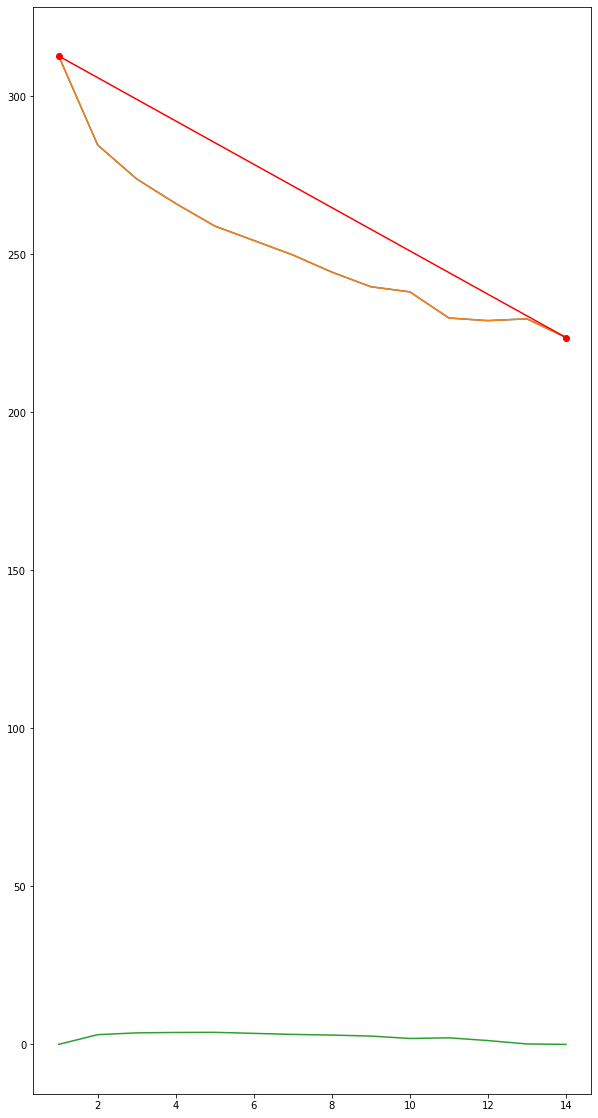


########### Optimum K-Value for the Class: 5
354
*************************** ABONE EKRAN HATALARI ***************************
Inside looping_df_class
Shape of Filtered Dataset: (467, 11046)
Inside Clustering
a = -4.067211159005721
b = 424.13647326578314


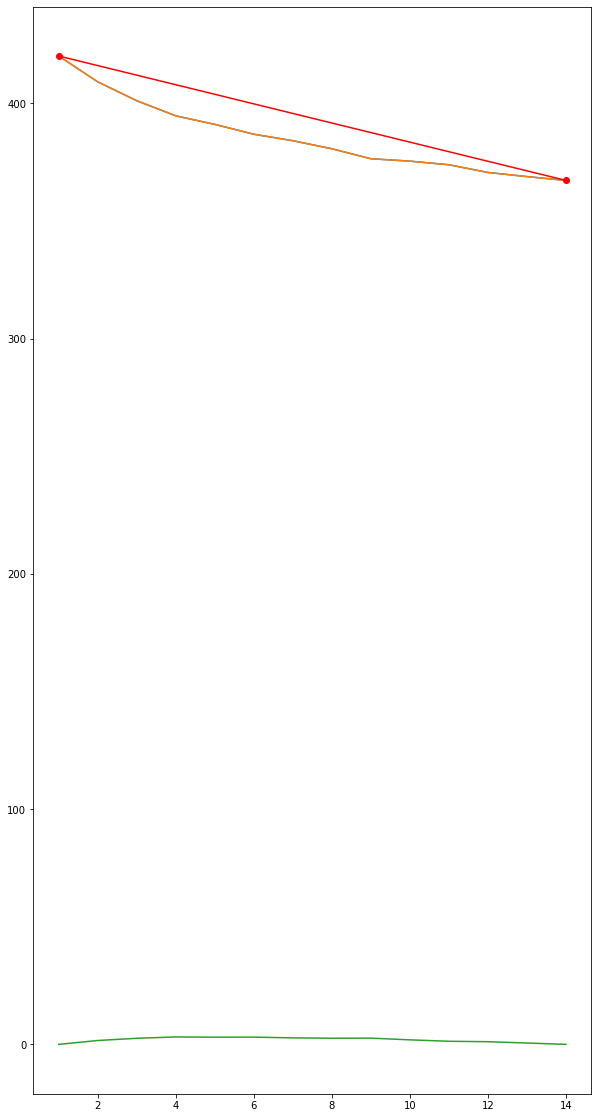


########### Optimum K-Value for the Class: 4
467
*************************** Siparis Sorunlari ***************************
Inside looping_df_class
Shape of Filtered Dataset: (201, 11046)
Inside Clustering
a = -5.548293102491598
b = 182.12027083894498


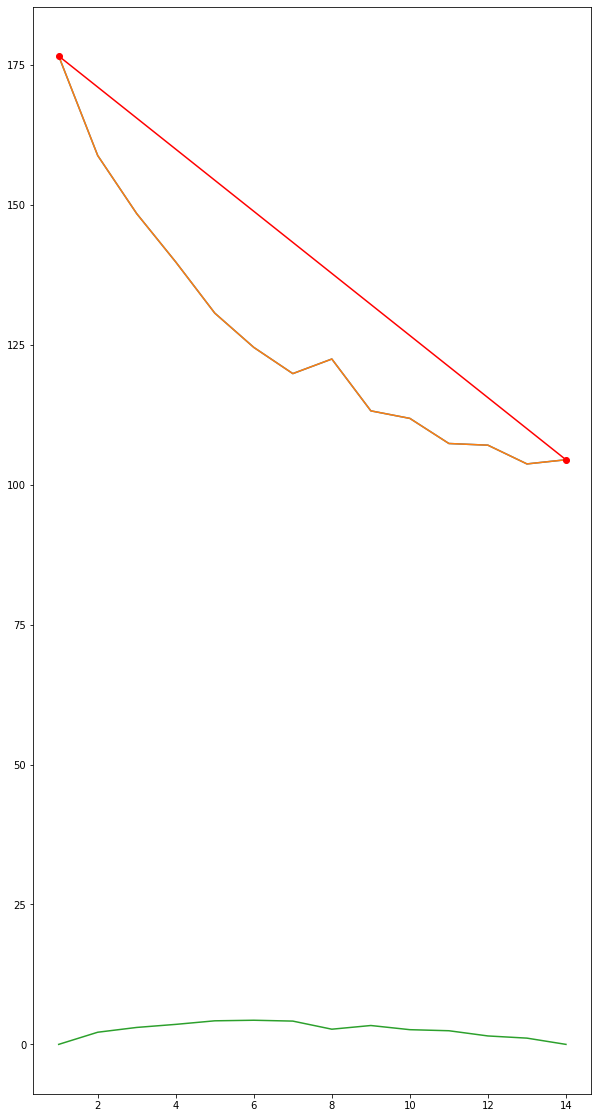


########### Optimum K-Value for the Class: 6
201
*************************** Others ***************************
Inside looping_df_class
Shape of Filtered Dataset: (170, 11046)
Inside Clustering
a = -1.9034072993247542
b = 155.93308548063234


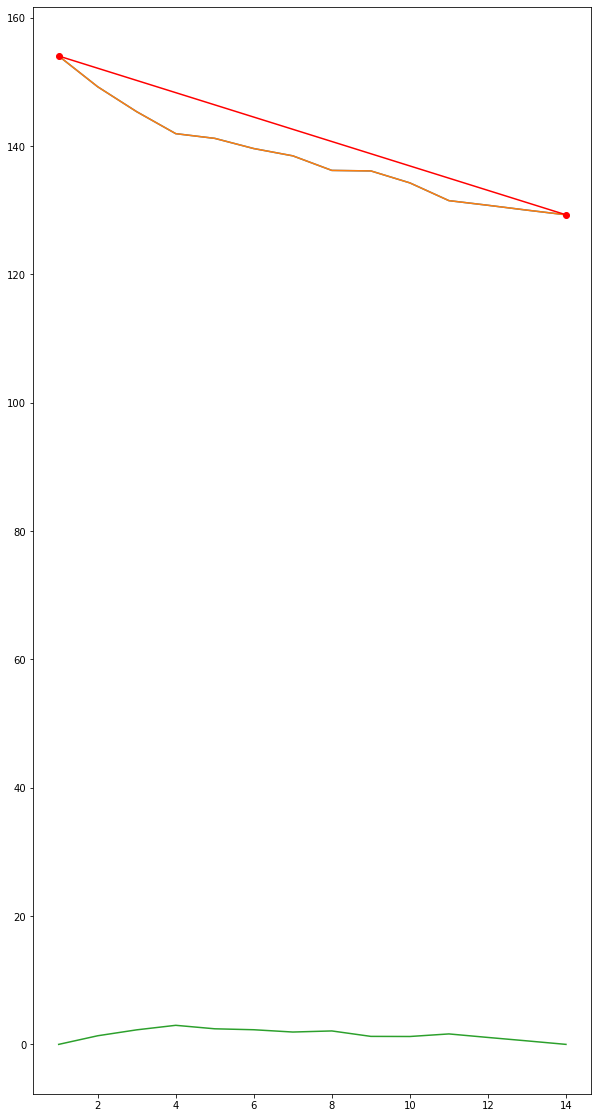


########### Optimum K-Value for the Class: 4
170
*************************** Misc ***************************
Inside looping_df_class
Shape of Filtered Dataset: (170, 11046)
Inside Clustering
a = -1.3948002460726614
b = 159.08953601114672


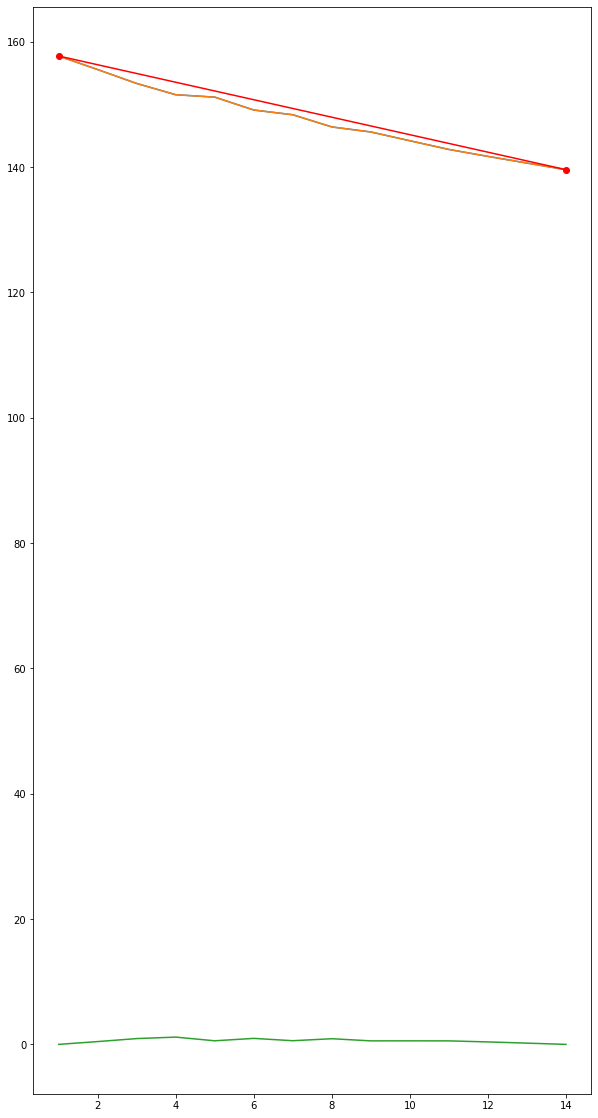


########### Optimum K-Value for the Class: 4
170


In [12]:
clustured_data = pd.DataFrame()
vectorised_df = vectorising_df(dataset)
   
for cls in classes:
    
    print("***************************",cls,"***************************")
    # Filtering df as per class
    classes_df = looping_df_class(vectorised_df, cls)
    print("Shape of Filtered Dataset:",classes_df.shape)
    clustered_df = perform_clustering(classes_df)
    print(len(clustered_df["Bucket"]))
    
    # Combining the dataframe
    clustured_data = pd.concat([clustured_data, clustered_df], ignore_index=True, sort=False)

In [13]:
print("Shape of Dataset:", dataset.shape)
print("Shape of dataset before clustering:",vectorised_df.shape)
print("Shape of dataset after clustering:",clustured_data.shape)

Shape of Dataset: (1834, 3)
Shape of dataset before clustering: (1834, 11046)
Shape of dataset after clustering: (1825, 11047)


In [14]:
dataset["PROBLEM_CATEGORY_DESC"].value_counts()

ABONE EKRAN HATALARI              467
KUR - Sipariş Sorunları           354
Bireysel Fatura Problemi          262
Siparis Sorunlari                 201
MNT Birey. Açılmayan Hat-VShop    201
Misc                              179
Others                            170
Name: PROBLEM_CATEGORY_DESC, dtype: int64

In [15]:
clustured_data["PROBLEM_CATEGORY_DESC"].value_counts()

ABONE EKRAN HATALARI              467
KUR - Sipariş Sorunları           354
Bireysel Fatura Problemi          262
Siparis Sorunlari                 201
MNT Birey. Açılmayan Hat-VShop    201
Misc                              170
Others                            170
Name: PROBLEM_CATEGORY_DESC, dtype: int64

In [16]:
dataset["PROBLEM_CATEGORY_DESC"].unique()

array(['MNT Birey. Açılmayan Hat-VShop', 'Bireysel Fatura Problemi',
       'KUR - Sipariş Sorunları', 'ABONE EKRAN HATALARI',
       'Siparis Sorunlari', 'Others', 'Misc'], dtype=object)

In [17]:
clustured_data.columns

Index(['aabone', 'aaldıg', 'aalmaktadir', 'aaron', 'aarset', 'aat', 'aba',
       'abadi', 'abart', 'abartilacak',
       ...
       'ştri', 'şuan', 'şuanki', 'şubat', 'şubatt', 'şım', 'WONUM',
       'FIRST_LOG', 'PROBLEM_CATEGORY_DESC', 'Bucket'],
      dtype='object', length=11047)

In [18]:
# Dropping other columns except input and target variable based on the clients input.
new_data = clustured_data[["WONUM", "FIRST_LOG","PROBLEM_CATEGORY_DESC", "Bucket"]]
new_data.head(3)

,WONUM,FIRST_LOG,PROBLEM_CATEGORY_DESC,Bucket
0,14118026,bilgi abone istiyor fatura görüntü işle tablet eder ekran kitlenmek ger devam etmemek abone gsme...,MNT Birey. Açılmayan Hat-VShop,3
1,14118547,hat destek talep sağl ancak bone başlatıl ser kon hatt aktif şebek erhap gel sim eder fakat görü...,MNT Birey. Açılmayan Hat-VShop,3
2,14118303,bekleme görüntü işle taraf eder ha gsm silinme şlem yapıl işle kal faturas rica alınıyor taraf i...,MNT Birey. Açılmayan Hat-VShop,2


In [19]:
new_data["PROBLEM_CATEGORY_DESC"].value_counts().median()

201.0

In [20]:
rec_count = new_data["PROBLEM_CATEGORY_DESC"].value_counts().min()

In [21]:
final_data = pd.DataFrame()
for cls in new_data["PROBLEM_CATEGORY_DESC"].unique():
    print("********",cls,"********")
    data = new_data.loc[new_data['PROBLEM_CATEGORY_DESC'] == cls]
    bucket_window = len(data["Bucket"].unique())
    datapoints = int(rec_count/bucket_window)
    print(datapoints)
    print("For each buckets data point should be:",datapoints)
    for bucket in data["Bucket"].unique():
        bucket_data = pd.DataFrame()
        temp_bucket = pd.DataFrame()
        bucket_data = data.loc[data['Bucket'] == bucket]
        if len(bucket_data) >= datapoints:
            temp_bucket = bucket_data.sample(int(datapoints))
            print("Shape of bucket data:", temp_bucket.shape )
        elif len(bucket_data) <= datapoints:
            temp_bucket = bucket_data
            print("Shape of bucket data:", temp_bucket.shape )
        
        final_data = pd.concat([final_data, temp_bucket], ignore_index=True, sort=False)


******** MNT Birey. Açılmayan Hat-VShop ********
42
For each buckets data point should be: 42
Shape of bucket data: (42, 4)
Shape of bucket data: (29, 4)
Shape of bucket data: (29, 4)
Shape of bucket data: (15, 4)
******** Bireysel Fatura Problemi ********
24
For each buckets data point should be: 24
Shape of bucket data: (24, 4)
Shape of bucket data: (24, 4)
Shape of bucket data: (24, 4)
Shape of bucket data: (23, 4)
Shape of bucket data: (5, 4)
Shape of bucket data: (24, 4)
Shape of bucket data: (10, 4)
******** KUR - Sipariş Sorunları ********
34
For each buckets data point should be: 34
Shape of bucket data: (34, 4)
Shape of bucket data: (34, 4)
Shape of bucket data: (34, 4)
Shape of bucket data: (34, 4)
Shape of bucket data: (19, 4)
******** ABONE EKRAN HATALARI ********
42
For each buckets data point should be: 42
Shape of bucket data: (42, 4)
Shape of bucket data: (42, 4)
Shape of bucket data: (42, 4)
Shape of bucket data: (42, 4)
******** Siparis Sorunlari ********
28
For each 

In [22]:
final_data["PROBLEM_CATEGORY_DESC"].value_counts()

ABONE EKRAN HATALARI              168
KUR - Sipariş Sorunları           155
Siparis Sorunlari                 145
Misc                              143
Bireysel Fatura Problemi          134
Others                            127
MNT Birey. Açılmayan Hat-VShop    115
Name: PROBLEM_CATEGORY_DESC, dtype: int64

In [23]:
final_data["PROBLEM_CATEGORY_DESC"].value_counts(normalize=True)

ABONE EKRAN HATALARI              0.170213
KUR - Sipariş Sorunları           0.157042
Siparis Sorunlari                 0.146910
Misc                              0.144883
Bireysel Fatura Problemi          0.135765
Others                            0.128673
MNT Birey. Açılmayan Hat-VShop    0.116515
Name: PROBLEM_CATEGORY_DESC, dtype: float64

In [24]:
final_data.head(3)

,WONUM,FIRST_LOG,PROBLEM_CATEGORY_DESC,Bucket
0,14118026,bilgi abone istiyor fatura görüntü işle tablet eder ekran kitlenmek ger devam etmemek abone gsme...,MNT Birey. Açılmayan Hat-VShop,3
1,14146007,işle istinaden yanlış kal başvuru nol sağl numara gsm şlem al hata destek iptali taş kay,MNT Birey. Açılmayan Hat-VShop,3
2,14145394,işle geçme kal rağmen statü orderda nol tamamlanma taş amamlana şlem tarih destek,MNT Birey. Açılmayan Hat-VShop,3


In [25]:
old_data = dataset
dataset = final_data[[ "FIRST_LOG","PROBLEM_CATEGORY_DESC"]]
dataset.head(3)

,FIRST_LOG,PROBLEM_CATEGORY_DESC
0,bilgi abone istiyor fatura görüntü işle tablet eder ekran kitlenmek ger devam etmemek abone gsme...,MNT Birey. Açılmayan Hat-VShop
1,işle istinaden yanlış kal başvuru nol sağl numara gsm şlem al hata destek iptali taş kay,MNT Birey. Açılmayan Hat-VShop
2,işle geçme kal rağmen statü orderda nol tamamlanma taş amamlana şlem tarih destek,MNT Birey. Açılmayan Hat-VShop


In [26]:
# Converting the Classses(String) to Factors(Integer)
dataset["Category_ID"] = dataset["PROBLEM_CATEGORY_DESC"].factorize()[0]

In [27]:
from io import StringIO
category_id_df = dataset[['PROBLEM_CATEGORY_DESC', 'Category_ID']].drop_duplicates().sort_values('Category_ID')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['Category_ID', 'PROBLEM_CATEGORY_DESC']].values)

******************************Before Normalizing the Data******************************


<Figure size 576x432 with 0 Axes>

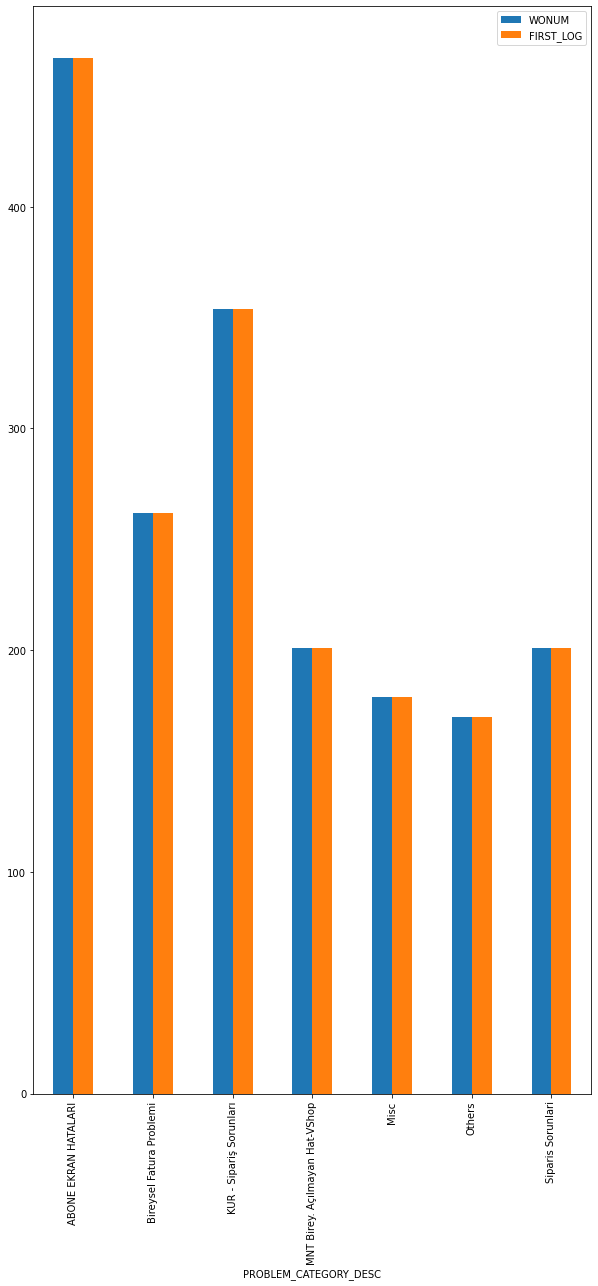

In [28]:
# Plotting a graph to visulalize the Class Distribution
print("******************************Before Normalizing the Data******************************")
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
old_data.groupby('PROBLEM_CATEGORY_DESC').count().plot.bar(ylim=0)
plt.show()

******************************After Normalizing the Data******************************


<Figure size 576x432 with 0 Axes>

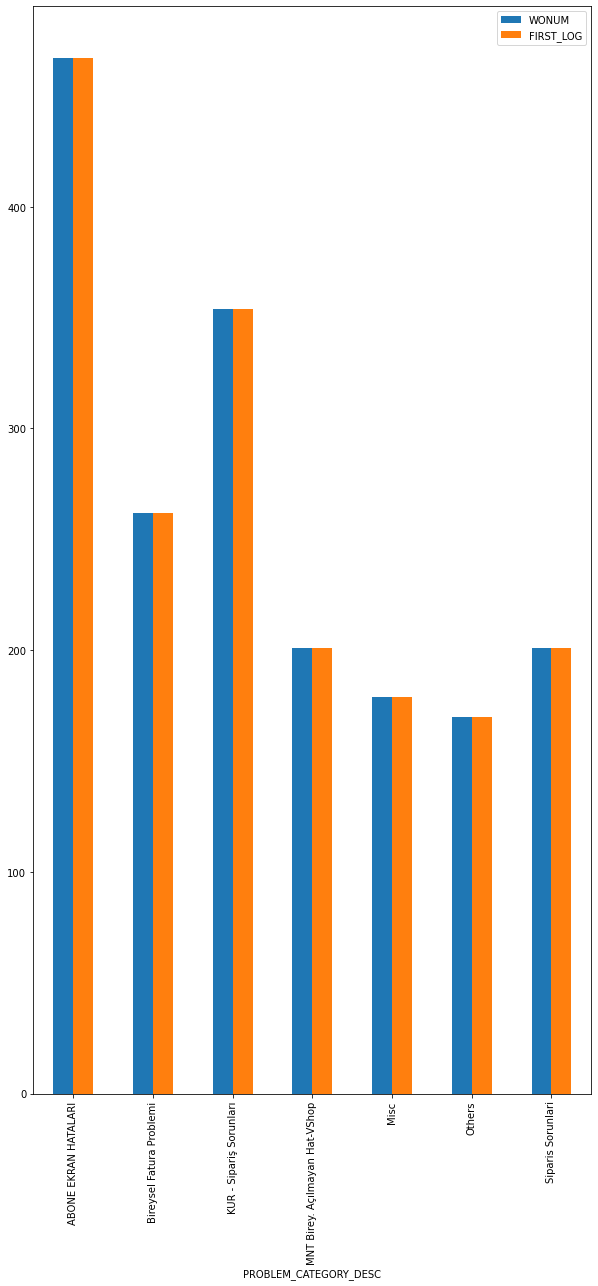

In [29]:
# Plotting a graph to visulalize the Class Distribution
import matplotlib.pyplot as plt
print("******************************After Normalizing the Data******************************")
fig = plt.figure(figsize=(8,6))
old_data.groupby('PROBLEM_CATEGORY_DESC').count().plot.bar(ylim=0)
plt.show()

******************************After Normalizing the Data******************************


<Figure size 576x432 with 0 Axes>

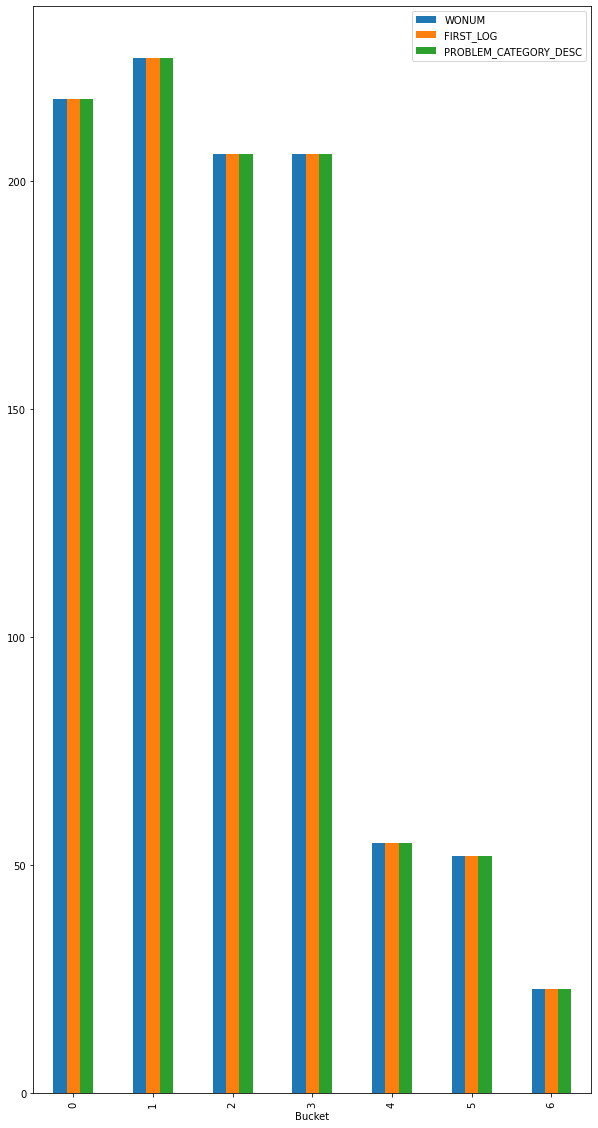

In [30]:
# Plotting a graph to visulalize the Class Distribution
import matplotlib.pyplot as plt
print("******************************After Normalizing the Data******************************")
fig = plt.figure(figsize=(8,6))
final_data.groupby('Bucket').count().plot.bar(ylim=0)
plt.show()

<AxesSubplot:xlabel='PROBLEM_CATEGORY_DESC'>

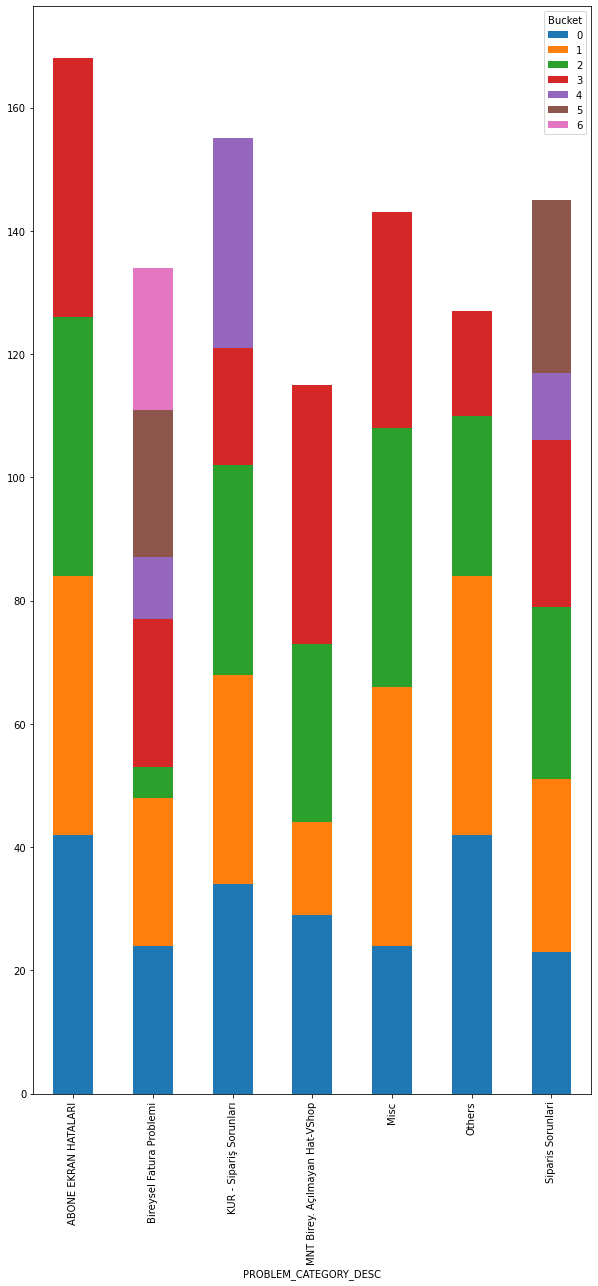

In [31]:
final_data.groupby(['PROBLEM_CATEGORY_DESC', 'Bucket']).size().unstack().plot(kind='bar', stacked=True)

In [32]:
"""
Converting the Text Data into Integer to feed to Model
"""

from sklearn.feature_extraction.text import TfidfVectorizer

#mindf = 0.1% max_df = 0.2/0.8
tfidfVector = TfidfVectorizer(max_features=10000,stop_words=stopwords.words('turkish'),use_idf=True,ngram_range=(1, 1))

features = tfidfVector.fit_transform(dataset["FIRST_LOG"]).toarray()
#labels = dataset.Category_ID
labels = dataset.PROBLEM_CATEGORY_DESC
print("\n The shape of features generated from TF-IDF is : ",features.shape)


 The shape of features generated from TF-IDF is :  (987, 8684)


In [33]:
"""
Utlizing sklearn.feature_selection.chi2 to find the terms that are the most correlated with each of the classes
"""

from sklearn.feature_selection import chi2
import numpy as np
N = 2
for FIRST_LOG, Category_ID in sorted(category_to_id.items()):
    features_chi2 = chi2(features, labels == Category_ID)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidfVector.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(FIRST_LOG))
    print(" Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
    print(" Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))
    print("\n*****************************************************************\n")

# 'ABONE EKRAN HATALARI':
 Most correlated unigrams:
. grev
. şım
 Most correlated bigrams:
. 

*****************************************************************

# 'Bireysel Fatura Problemi':
 Most correlated unigrams:
. grev
. şım
 Most correlated bigrams:
. 

*****************************************************************

# 'KUR - Sipariş Sorunları':
 Most correlated unigrams:
. grev
. şım
 Most correlated bigrams:
. 

*****************************************************************

# 'MNT Birey. Açılmayan Hat-VShop':
 Most correlated unigrams:
. grev
. şım
 Most correlated bigrams:
. 

*****************************************************************

# 'Misc':
 Most correlated unigrams:
. grev
. şım
 Most correlated bigrams:
. 

*****************************************************************

# 'Others':
 Most correlated unigrams:
. grev
. şım
 Most correlated bigrams:
. 

*****************************************************************

# 'Siparis Sorunlari':
 Most correl

In [34]:
# Defining input and output variable for Model
X_train = features
Y_train = labels

[13:18:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:19:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:19:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:20:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

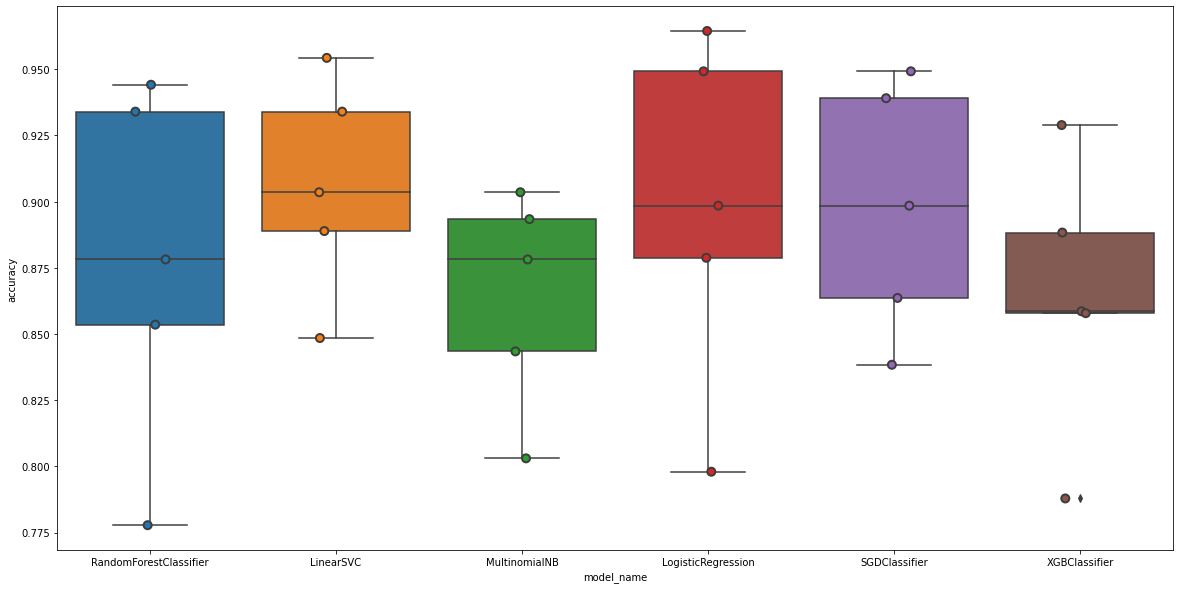

In [35]:
"""
Training multiple model and observe the better performing alogorithm
"""

os.system('cls')
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn import model_selection, naive_bayes, svm


# Ensemble's
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import lightgbm as lgbm
from catboost import Pool, CatBoostClassifier
from xgboost import XGBClassifier
# Include SVC

fig = plt.figure(figsize=(20 ,10))

lgbm_params =  {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'multiclass',
    'num_class': len(dataset["PROBLEM_CATEGORY_DESC"].unique()),
    'metric': ['multi_error'],
    "learning_rate": 0.05,
     "num_leaves": 60,
     "max_depth": 9,
     "feature_fraction": 0.45,
     "bagging_fraction": 0.3,
     "reg_alpha": 0.15,
     "reg_lambda": 0.15,
#      "min_split_gain": 0,
      "min_child_weight": 0
                }

#Converting the dataset in proper LGB format
d_train=lgbm.Dataset(X_train, label=Y_train)

models = [
    RandomForestClassifier(n_estimators=200, max_depth=30, random_state=0),
    #svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto',probability=True),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
    SGDClassifier(),
    #lgbm.train(lgbm_params,d_train,100),
    XGBClassifier(base_score=0.5, booster='gbtree', objective="multi:softmax"),
    #AdaBoostClassifier(),
    #CatBoostClassifier(iterations=50,learning_rate=0.003,loss_function='MultiClass')
]


"""

#svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
    
lgbm(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                        learning_rate=0.5, max_depth=7, min_child_samples=20,
                        min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
                        n_jobs=-1, num_leaves=500, objective='multiclass', random_state=None,
                        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0),
    XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                    colsample_bytree=1, gamma=0, learning_rate=0.9, max_delta_step=0,
                    max_depth = 7, min_child_weight=1, missing=None, n_estimators=100,
                    n_jobs=5, nthread=None, objective='multi:softmax', random_state=0,
                    reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                    silent=True, subsample=1),
    AdaBoostClassifier(classes=dataset["PROBLEM_CATEGORY_DESC"].unique())
    #CatBoostClassifier(iterations=50,learning_rate=0.003,custom_metric=['Logloss','AUC:hints=skip_train~false'],random_strength=0.1,depth=8,loss_function='MultiClass',eval_metric='Accuracy',leaf_estimation_method='Newton')


"""

CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, X_train, Y_train, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy,model))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy','model'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [36]:
# Accuracy of Model
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.905850
LogisticRegression        0.897790
MultinomialNB             0.864318
RandomForestClassifier    0.877532
SGDClassifier             0.897764
XGBClassifier             0.864318
Name: accuracy, dtype: float64

In [37]:
# Accuracy of Model
g1 = cv_df.groupby(['model_name'],as_index=False).accuracy.mean()
temp_df1 = pd.DataFrame(g1)
temp_df1

temp_df1 = temp_df1.reset_index()
temp_df1 = temp_df1.drop(['index'],axis=1)
temp_df1

,model_name,accuracy
0,LinearSVC,0.905850
1,LogisticRegression,0.897790
2,MultinomialNB,0.864318
3,RandomForestClassifier,0.877532
4,SGDClassifier,0.897764
5,XGBClassifier,0.864318


In [38]:
var = temp_df1[temp_df1.accuracy == temp_df1.accuracy.max()]
var = var.reset_index()
var = var.drop(['index'],axis=1)
model_name = var["model_name"][0]
print("Model Name:", model_name)

Model Name: LinearSVC


In [39]:
filter_df = cv_df.loc[cv_df["model_name"] == model_name]
print("Model:",filter_df["model"].unique()[0])

Model: LinearSVC()


In [40]:
selected_model = filter_df["model"].unique()[0]

In [41]:
cv_df

,model_name,fold_idx,accuracy,model
0,RandomForestClassifier,0,0.777778,"RandomForestClassifier(max_depth=30, n_estimators=200, random_state=0)"
1,RandomForestClassifier,1,0.853535,"RandomForestClassifier(max_depth=30, n_estimators=200, random_state=0)"
2,RandomForestClassifier,2,0.934010,"RandomForestClassifier(max_depth=30, n_estimators=200, random_state=0)"
3,RandomForestClassifier,3,0.944162,"RandomForestClassifier(max_depth=30, n_estimators=200, random_state=0)"
4,RandomForestClassifier,4,0.878173,"RandomForestClassifier(max_depth=30, n_estimators=200, random_state=0)"
5,LinearSVC,0,0.848485,LinearSVC()
6,LinearSVC,1,0.888889,LinearSVC()
7,LinearSVC,2,0.954315,LinearSVC()
8,LinearSVC,3,0.934010,LinearSVC()
9,LinearSVC,4,0.903553,LinearSVC()


### Model Engineering

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier , VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from numpy import mean
from numpy import std
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.calibration import CalibratedClassifierCV

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, dataset.index, test_size=0.25, random_state=0, stratify=labels)

clf1 = LinearSVC()
clf2 = RandomForestClassifier(random_state=1)
clf3 = XGBClassifier(base_score=0.5, booster='gbtree', objective="multi:softmax")
clf4 = LogisticRegression(random_state=0)
clf5 = SGDClassifier()
clf6 = CalibratedClassifierCV(LinearSVC())
clf7 = MultinomialNB()
vot_clf = VotingClassifier(estimators = [('LinearSVC', clf6), ('RandomForest', clf2), ('LogisticRegression', clf4)], voting = 'soft')

from sklearn.model_selection import RepeatedKFold
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)

scores = cross_val_score(vot_clf, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

vot_clf.fit(X_train, y_train)

train_pred = vot_clf.predict(X_train)
y_pred = vot_clf.predict(X_test)

"""
estimators = [('SVC', clf1),('RF', clf2),('XGB',clf3),('LR',clf4)]

sclf = StackingClassifier(estimators=estimators,final_estimator=dt)

params = {'RF__n_estimators': list(range(100,1000,100)),
          'LR__C': list(range(1,10,1)),
          'SVC__C':np.arange(0.01,100,10)
         }
grid = GridSearchCV(estimator=sclf, param_grid=params,verbose=2, cv=5,n_jobs=-1)
grid.fit(X_train,y_train)

#y_pred = grid.pred(X_test)

# Predicting the PROBLEM_CATEGORY_DESCRIPTION for Test data
y_pred = grid.predict(X_test)

# Predicting the PROBLEM_CATEGORY_DESCRIPTION for Train data
train_pred = grid.predict(X_train)


print('precision on the test set: ', precision_score(y_true, y_pred))
print('accuracy on the test set: ', accuracy_score(y_true, y_pred))

print('AUC is: ', auc(fpr,tpr))

print(metrics.classification_report(y_test, y_pred, target_names=dataset["PROBLEM_CATEGORY_DESC"].unique()))

"""

'\nestimators = [(\'SVC\', clf1),(\'RF\', clf2),(\'XGB\',clf3),(\'LR\',clf4)]\n\nsclf = StackingClassifier(estimators=estimators,final_estimator=dt)\n\nparams = {\'RF__n_estimators\': list(range(100,1000,100)),\n          \'LR__C\': list(range(1,10,1)),\n          \'SVC__C\':np.arange(0.01,100,10)\n         }\ngrid = GridSearchCV(estimator=sclf, param_grid=params,verbose=2, cv=5,n_jobs=-1)\ngrid.fit(X_train,y_train)\n\n#y_pred = grid.pred(X_test)\n\n# Predicting the PROBLEM_CATEGORY_DESCRIPTION for Test data\ny_pred = grid.predict(X_test)\n\n# Predicting the PROBLEM_CATEGORY_DESCRIPTION for Train data\ntrain_pred = grid.predict(X_train)\n\n\nprint(\'precision on the test set: \', precision_score(y_true, y_pred))\nprint(\'accuracy on the test set: \', accuracy_score(y_true, y_pred))\n\nprint(\'AUC is: \', auc(fpr,tpr))\n\nprint(metrics.classification_report(y_test, y_pred, target_names=dataset["PROBLEM_CATEGORY_DESC"].unique()))\n\n'

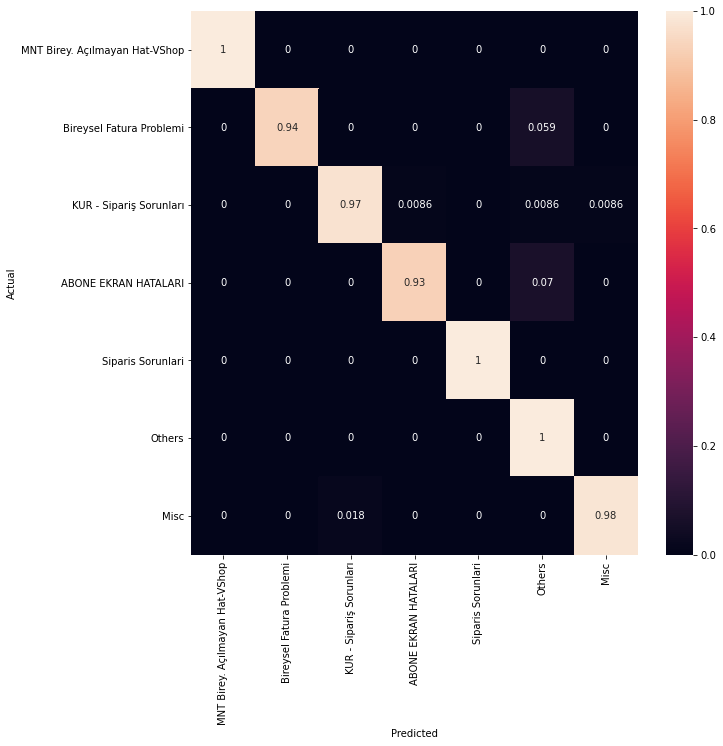

In [43]:
"""
Plotting the Confustion Matrix in the form of Heat Matrix
"""

from sklearn.metrics import confusion_matrix
conf_mat1 = confusion_matrix(y_train, train_pred)
fig, ax = plt.subplots(figsize=(10,10))
cmn = conf_mat1.astype('float') / conf_mat1.sum(axis=1)[:, np.newaxis]

"""
# Uncomment this codeblock to get the data in the integer form

sns.heatmap(conf_mat, annot=True, fmt='d',xticklabels=category_id_df.PROBLEM_CATEGORY_DESC.values, yticklabels=category_id_df.PROBLEM_CATEGORY_DESC.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
"""

sns.heatmap(cmn, annot=True, xticklabels=category_id_df.PROBLEM_CATEGORY_DESC.values, yticklabels=category_id_df.PROBLEM_CATEGORY_DESC.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [44]:
# Generating the Classification Report on Train Data
from sklearn import metrics
print(metrics.classification_report(y_train, train_pred, target_names=dataset["PROBLEM_CATEGORY_DESC"].unique()))

                                precision    recall  f1-score   support

MNT Birey. Açılmayan Hat-VShop       1.00      1.00      1.00       126
      Bireysel Fatura Problemi       1.00      0.94      0.97       101
       KUR - Sipariş Sorunları       0.98      0.97      0.98       116
          ABONE EKRAN HATALARI       0.99      0.93      0.96        86
             Siparis Sorunlari       1.00      1.00      1.00       107
                        Others       0.88      1.00      0.94        95
                          Misc       0.99      0.98      0.99       109

                      accuracy                           0.98       740
                     macro avg       0.98      0.98      0.98       740
                  weighted avg       0.98      0.98      0.98       740



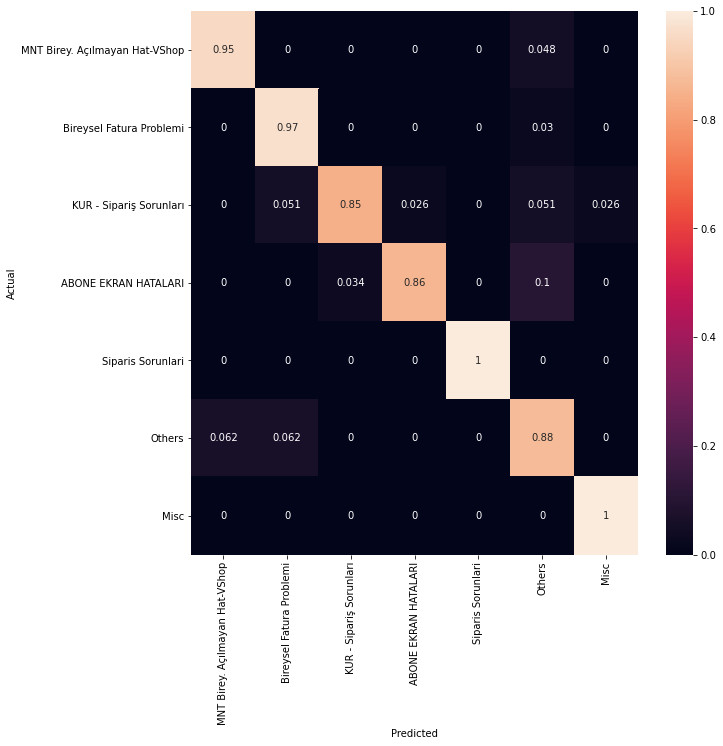

In [45]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
cmn = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]

"""
# Uncomment this codeblock to get the data in the integer form

sns.heatmap(conf_mat, annot=True, fmt='d',xticklabels=category_id_df.PROBLEM_CATEGORY_DESC.values, yticklabels=category_id_df.PROBLEM_CATEGORY_DESC.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
"""

sns.heatmap(cmn, annot=True, xticklabels=category_id_df.PROBLEM_CATEGORY_DESC.values, yticklabels=category_id_df.PROBLEM_CATEGORY_DESC.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [46]:
# Generating the Classification Report on Test Data
print(metrics.classification_report(y_test, y_pred, target_names=dataset["PROBLEM_CATEGORY_DESC"].unique()))

                                precision    recall  f1-score   support

MNT Birey. Açılmayan Hat-VShop       0.95      0.95      0.95        42
      Bireysel Fatura Problemi       0.89      0.97      0.93        33
       KUR - Sipariş Sorunları       0.97      0.85      0.90        39
          ABONE EKRAN HATALARI       0.96      0.86      0.91        29
             Siparis Sorunlari       1.00      1.00      1.00        36
                        Others       0.78      0.88      0.82        32
                          Misc       0.97      1.00      0.99        36

                      accuracy                           0.93       247
                     macro avg       0.93      0.93      0.93       247
                  weighted avg       0.94      0.93      0.93       247



#### To visualize the probability weighting, we fit each classifier on the training set and plot the predicted class probabilities for the first sample in this example dataset.

In [47]:
"""
# predict class probabilities for all classifiers
probas = [c.fit(X_train, y_train).predict_proba(X_test) for c in (clf1, clf2, clf3, vot_clf)]

# get class probabilities for the first sample in the dataset
class1_1 = [pr[0, 0] for pr in probas]
class2_1 = [pr[0, 1] for pr in probas]
class3_1 = [pr[0, 2] for pr in probas]
class4_1 = [pr[0, 3] for pr in probas]
class5_1 = [pr[0, 4] for pr in probas]
class6_1 = [pr[0, 5] for pr in probas]
class7_1 = [pr[0, 6] for pr in probas]


# plotting

N = 4  # number of groups
ind = np.arange(N)  # group positions
width = 0.35  # bar width

fig, ax = plt.subplots()

# bars for classifier 1-3
p1 = ax.bar(ind, np.hstack(([class1_1[:-1], [0]])), width,
            color='green', edgecolor='k')
p2 = ax.bar(ind + width, np.hstack(([class2_1[:-1], [0]])), width,
            color='lightgreen', edgecolor='k')

# bars for VotingClassifier
p3 = ax.bar(ind, [0, 0, 0, class1_1[-1]], width,
            color='blue', edgecolor='k')
p4 = ax.bar(ind + width, [0, 0, 0, class2_1[-1]], width,
            color='steelblue', edgecolor='k')

p5 = ax.bar(ind + width, [0, 0, 0, class2_1[-1]], width,
            color='red', edgecolor='k')

# plot annotations
plt.axvline(2.8, color='k', linestyle='dashed')
ax.set_xticks(ind + width)
ax.set_xticklabels(['LogisticRegression\nweight 1',
                    'GaussianNB\nweight 1',
                    'RandomForestClassifier\nweight 5',
                    'VotingClassifier\n(average probabilities)'],
                   rotation=40,
                   ha='right')
plt.ylim([0, 1])
plt.title('Class probabilities for sample 1 by different classifiers')
plt.legend([p1[0], p2[0], p3[0], p4[0], p5[0]], dataset.PROBLEM_CATEGORY_DESC.unique(), loc='upper left')
plt.tight_layout()
plt.show()

"""

"\n# predict class probabilities for all classifiers\nprobas = [c.fit(X_train, y_train).predict_proba(X_test) for c in (clf1, clf2, clf3, vot_clf)]\n\n# get class probabilities for the first sample in the dataset\nclass1_1 = [pr[0, 0] for pr in probas]\nclass2_1 = [pr[0, 1] for pr in probas]\nclass3_1 = [pr[0, 2] for pr in probas]\nclass4_1 = [pr[0, 3] for pr in probas]\nclass5_1 = [pr[0, 4] for pr in probas]\nclass6_1 = [pr[0, 5] for pr in probas]\nclass7_1 = [pr[0, 6] for pr in probas]\n\n\n# plotting\n\nN = 4  # number of groups\nind = np.arange(N)  # group positions\nwidth = 0.35  # bar width\n\nfig, ax = plt.subplots()\n\n# bars for classifier 1-3\np1 = ax.bar(ind, np.hstack(([class1_1[:-1], [0]])), width,\n            color='green', edgecolor='k')\np2 = ax.bar(ind + width, np.hstack(([class2_1[:-1], [0]])), width,\n            color='lightgreen', edgecolor='k')\n\n# bars for VotingClassifier\np3 = ax.bar(ind, [0, 0, 0, class1_1[-1]], width,\n            color='blue', edgecolor='k

In [48]:
import pickle

# Declaring the File Name
model_filename = r"C:/Users/ETAACPH/OneDrive - Ericsson/Project/Vodafone/Dev/model/Ensembled_Bal_LR_pickle_model_7_class.pickle"
tfidf_filename = r"C:/Users/ETAACPH/OneDrive - Ericsson/Project/Vodafone/Dev/model/Ensembled_Bal_TFIDF_vector_7_class.pickle"


# Creating and Saving the pickle file for future useage
with open(model_filename, 'wb') as file:
    pickle.dump(vot_clf, file)
    
with open(tfidf_filename, 'wb') as file:
    pickle.dump(tfidfVector, file)

In [49]:
def data_preprocessing(text):
    """
    During model inference, the test data should undergo the preprocessing steps followed during the training of model
    """
    text = remove_punct_char_num(text)
    text = remove_url_data(text)
    text = perform_word_tokenize(text)
    text = remove_repeating_words(text)
    text = remove_small_words(text)
    text = remove_stop_words(text)
    text = perfrom_word_stemming(text)
    text = convert_to_sentence(text)
    text = convert_to_lower(text) 
    
    return text

In [50]:
# Load from model for pickle file
with open(model_filename, 'rb') as file:
    pickle_model = pickle.load(file)

pickle_model

VotingClassifier(estimators=[('LinearSVC',
                              CalibratedClassifierCV(base_estimator=LinearSVC())),
                             ('RandomForest',
                              RandomForestClassifier(random_state=1)),
                             ('LogisticRegression',
                              LogisticRegression(random_state=0))],
                 voting='soft')

In [51]:
# Loading TFIDF Count vectorzer object pickle from file
with open(tfidf_filename, 'rb') as file:
    TfIDFVector = pickle.load(file)

TfIDFVector

TfidfVectorizer(max_features=10000,
                stop_words=['acaba', 'ama', 'aslında', 'az', 'bazı', 'belki',
                            'biri', 'birkaç', 'birşey', 'biz', 'bu', 'çok',
                            'çünkü', 'da', 'daha', 'de', 'defa', 'diye', 'eğer',
                            'en', 'gibi', 'hem', 'hep', 'hepsi', 'her', 'hiç',
                            'için', 'ile', 'ise', 'kez', ...])

In [52]:
# Enter the test data as input to model

input_log = input("Please enter the FIRST_LOG for Prediction:\n")
#input_log = """MÜŞTERİMİZ HALK BANKASINDAN 15.01.2021 TARİHİNDE 235 TLLİK MÜKERER ÖDEME YAPMIŞTIR BU ÖDEMENİN ŞUANKİ ÇIKAN FATURASINDAN DÜŞÜLMESİNİ RİCA EDİYOR .
#"""
input_log = data_preprocessing(input_log)

Please enter the FIRST_LOG for Prediction:
 "5376624717 gsm için faturasız mnp yapılmış işlem beklemede kalmıştır.İşlem tarafımızdan silinmek istendiğinde hata alınıyor.Ekran görüntüsü eklenecek işlemin tarafınızdan silinmesi için yardımınızı rica ederiz.... MÜŞTERİMİZİN PRE GEÇİŞİ ALINMIŞTIR ANCAK İŞLEM TAMAMLANDIKTAN SONRA MÜŞTERİMİZ VAZGEÇMİŞTİR. İPTALİNİ İSTEMEKTEDİR."


In [53]:
"""
Utilize the below dataframe iff we used category as input to model
"""

cat_df = dataset[["PROBLEM_CATEGORY_DESC", "Category_ID"]]
cat_df.head(3)

cat_df.drop_duplicates()
category_dict = dict(cat_df.values)
category_dict

{'MNT Birey. Açılmayan Hat-VShop': 0,
 'Bireysel Fatura Problemi': 1,
 'KUR - Sipariş Sorunları': 2,
 'ABONE EKRAN HATALARI': 3,
 'Siparis Sorunlari': 4,
 'Others': 5,
 'Misc': 6}

In [54]:
# Transforming the Text Data into Numerical Data to feed saved model and predict the PROBLEM_CATEGORY_DESCRIPTION
from sklearn.calibration import CalibratedClassifierCV
def get_key(val):
    for key, value in category_dict.items():
         if val == value:
             return key
 
    return "key doesn't exist"

#clf = CalibratedClassifierCV(pickle_model) 
#clf.fit(X_train, y_train)
#y_proba = clf.predict_proba(X_test)

feature = TfIDFVector.transform([input_log])
pred_clss = pickle_model.predict_proba(feature)
#print("Predicted PROBLEM_CATEGORY_DESCRIPTION:", get_key(pickle_model.predict(feature)[0]))
print("Predicted PROBLEM_CATEGORY_DESCRIPTION:", pickle_model.predict(feature)[0])
print("\nConfidence of Prediction:", np.max(pickle_model.predict_proba(feature)))

Predicted PROBLEM_CATEGORY_DESCRIPTION: MNT Birey. Açılmayan Hat-VShop

Confidence of Prediction: 0.9692611143739374


In [55]:
from sklearn.pipeline import make_pipeline
c = make_pipeline(TfIDFVector,pickle_model)
from lime import lime_text
explainer = lime_text.LimeTextExplainer(class_names=c.classes_)
explained = explainer.explain_instance(input_log,c.predict_proba,top_labels=1)
explained.show_in_notebook( predict_proba=True, show_predicted_value=False)

In [56]:
from wordcloud import WordCloud, STOPWORDS

def plot_word_cloud(words):
    
    wordcloud = WordCloud(stopwords=stop_words, background_color="white", max_words=10,collocations=False).generate(str(words))
    wordcloud.words_

    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

************************************************************************************
 Word Count for the class: MNT Birey. Açılmayan Hat-VShop


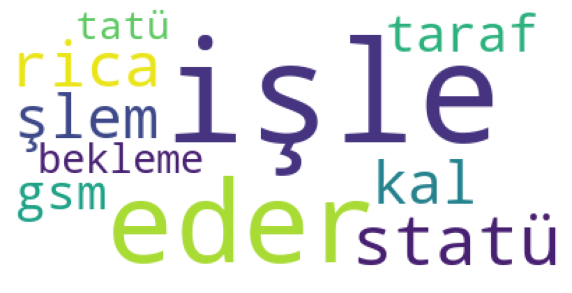

************************************************************************************
 Word Count for the class: Bireysel Fatura Problemi


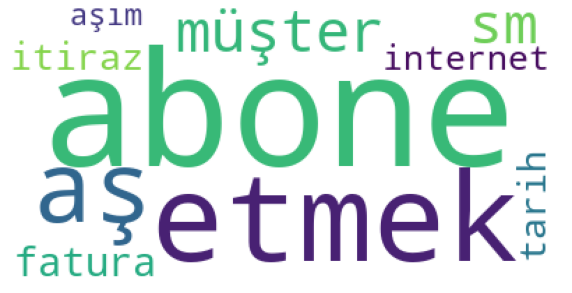

************************************************************************************
 Word Count for the class: KUR - Sipariş Sorunları


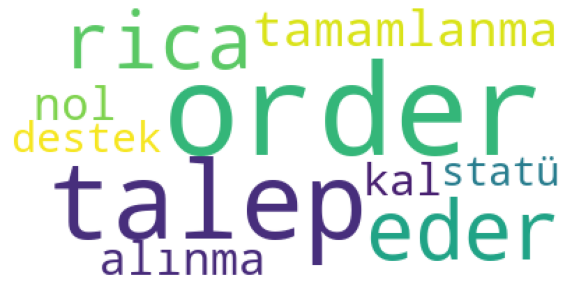

************************************************************************************
 Word Count for the class: ABONE EKRAN HATALARI


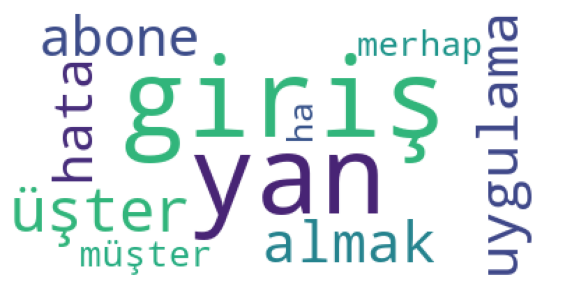

************************************************************************************
 Word Count for the class: Siparis Sorunlari


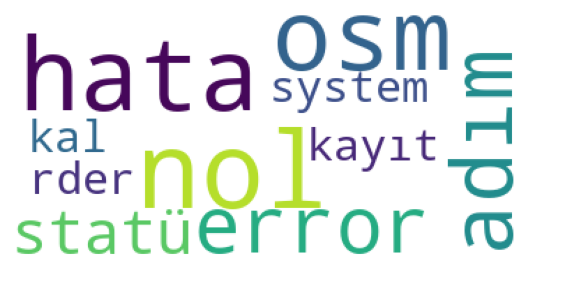

************************************************************************************
 Word Count for the class: Others


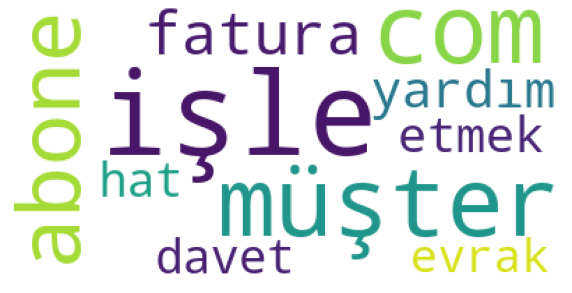

************************************************************************************
 Word Count for the class: Misc


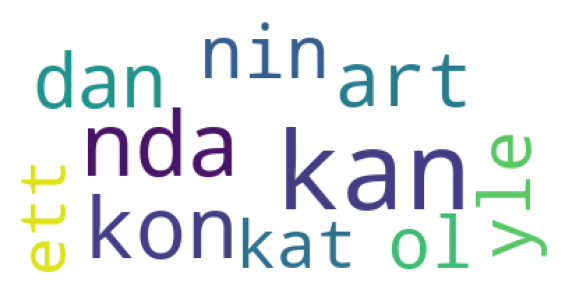

In [57]:
for cls in dataset["PROBLEM_CATEGORY_DESC"].unique():
    data = dataset.loc[dataset["PROBLEM_CATEGORY_DESC"] == cls]
    if data.empty:
        print("")
    else:
        print("************************************************************************************")
        print(" Word Count for the class:", cls)
        words = data["FIRST_LOG"]
        plot_word_cloud(words)

In [59]:
# To manually verify why some failed
from IPython.display import display

for predicted in category_id_df.Category_ID:
    print("predicted",predicted)
    for actual in category_id_df.Category_ID:
        print("actual",actual)
        if predicted != actual and conf_mat[actual, predicted] >= 1:
            print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
            print(id_to_category[actual]);print(id_to_category[predicted]);print(conf_mat[actual, predicted])
            display(dataset.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][["PROBLEM_CATEGORY_DESC", "FIRST_LOG"]])
            print('')

predicted 0
actual 0
actual 1
actual 2
actual 3
actual 4
actual 5
'Others' predicted as 'MNT Birey. Açılmayan Hat-VShop' : 2 examples.
Others
MNT Birey. Açılmayan Hat-VShop
2


,PROBLEM_CATEGORY_DESC,FIRST_LOG



actual 6
predicted 1
actual 0
actual 1
actual 2
'KUR - Sipariş Sorunları' predicted as 'Bireysel Fatura Problemi' : 2 examples.
KUR - Sipariş Sorunları
Bireysel Fatura Problemi
2


,PROBLEM_CATEGORY_DESC,FIRST_LOG



actual 3
actual 4
actual 5
'Others' predicted as 'Bireysel Fatura Problemi' : 2 examples.
Others
Bireysel Fatura Problemi
2


,PROBLEM_CATEGORY_DESC,FIRST_LOG



actual 6
predicted 2
actual 0
actual 1
actual 2
actual 3
'ABONE EKRAN HATALARI' predicted as 'KUR - Sipariş Sorunları' : 1 examples.
ABONE EKRAN HATALARI
KUR - Sipariş Sorunları
1


,PROBLEM_CATEGORY_DESC,FIRST_LOG



actual 4
actual 5
actual 6
predicted 3
actual 0
actual 1
actual 2
'KUR - Sipariş Sorunları' predicted as 'ABONE EKRAN HATALARI' : 1 examples.
KUR - Sipariş Sorunları
ABONE EKRAN HATALARI
1


,PROBLEM_CATEGORY_DESC,FIRST_LOG



actual 3
actual 4
actual 5
actual 6
predicted 4
actual 0
actual 1
actual 2
actual 3
actual 4
actual 5
actual 6
predicted 5
actual 0
'MNT Birey. Açılmayan Hat-VShop' predicted as 'Others' : 2 examples.
MNT Birey. Açılmayan Hat-VShop
Others
2


,PROBLEM_CATEGORY_DESC,FIRST_LOG



actual 1
'Bireysel Fatura Problemi' predicted as 'Others' : 1 examples.
Bireysel Fatura Problemi
Others
1


,PROBLEM_CATEGORY_DESC,FIRST_LOG



actual 2
'KUR - Sipariş Sorunları' predicted as 'Others' : 2 examples.
KUR - Sipariş Sorunları
Others
2


,PROBLEM_CATEGORY_DESC,FIRST_LOG



actual 3
'ABONE EKRAN HATALARI' predicted as 'Others' : 3 examples.
ABONE EKRAN HATALARI
Others
3


,PROBLEM_CATEGORY_DESC,FIRST_LOG



actual 4
actual 5
actual 6
predicted 6
actual 0
actual 1
actual 2
'KUR - Sipariş Sorunları' predicted as 'Misc' : 1 examples.
KUR - Sipariş Sorunları
Misc
1


,PROBLEM_CATEGORY_DESC,FIRST_LOG



actual 3
actual 4
actual 5
actual 6
